In [30]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# !pip install pyreadstat
# !pip install --upgrade pandas

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [32]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stock_market.csv')
df.describe()

,Capital,PER,EPS,ROE,PBR,BPS,Group_PER,Revenue,Operating_Income,Net_Income,...,Debt_continuous,Retention,Retention_Continuous,Open,High,Low,Close,DaytoDay,Volume,Highest_Price
count,250.000000,249.000000,250.000000,249.00000,250.000000,2.500000e+02,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.000000
mean,10898.852000,4.545221,209.928000,6.77510,1.072160,7.551041e+04,17.908800,9316.360000,632.992000,362.128000,...,1.828000,2839.620400,2.996000,38892.124000,39676.600000,38561.144000,39294.172000,633.944000,6.018891e+05,56882.124000
std,57713.804674,92.761163,3551.201312,24.26233,1.220344,1.883453e+05,24.351651,23830.066818,3001.286352,2320.302106,...,1.208411,6751.631504,1.768756,72336.989575,73809.494728,71944.046303,73414.157777,1661.466236,2.976599e+06,103776.416399
min,30.000000,-554.080000,-27196.000000,-118.36000,-5.150000,-5.380000e+02,-54.430000,13.000000,-579.000000,-2322.000000,...,1.000000,-140.670000,1.000000,0.000000,0.000000,0.000000,299.000000,0.000000,0.000000e+00,0.000000
25%,855.250000,2.930000,-71.000000,1.59000,0.430000,5.237000e+03,6.710000,495.000000,2.000000,-20.000000,...,1.000000,271.360000,1.000000,4631.250000,4756.250000,4575.000000,4647.500000,45.000000,5.815000e+03,7369.500000
50%,1663.500000,6.760000,79.500000,6.39000,0.670000,1.570500e+04,10.405000,1774.000000,47.000000,22.000000,...,1.000000,957.585000,3.000000,14175.000000,14425.000000,14025.000000,14325.000000,160.000000,5.475950e+04,21450.000000
75%,4144.000000,16.850000,672.250000,11.48000,1.367500,6.239950e+04,20.600000,5452.000000,216.000000,148.250000,...,2.000000,2720.487500,5.000000,41162.500000,41987.500000,39875.000000,40287.500000,500.000000,2.313110e+05,60806.750000
max,819003.000000,544.240000,15024.000000,305.77000,9.220000,2.011830e+06,127.460000,171884.000000,42195.000000,33199.000000,...,5.000000,64024.100000,5.000000,632000.000000,654000.000000,632000.000000,654000.000000,19000.000000,4.290845e+07,813000.000000


In [33]:
df.head()

,ID,Name,Market,Category,Capital,PER,EPS,ROE,PBR,BPS,...,Retention_Continuous,Open,High,Low,Close,DaytoDay,Volume,Highest_Price,Highest_Date,update_date
0,20,동화약품,KOSPI,제약,3282,22.82,204,5.27,1.16,12534,...,5,11400,11750,11400,11750,300,67692,21550,2020-08-11,2022-05-13 7:04
1,40,KR모터스,KOSPI,자동차,761,-8.77,-48,-25.82,2.25,385,...,1,786,804,786,792,8,80163,1450,2019-07-05,2022-05-13 6:31
2,50,경방,KOSPI,"섬유,의류,신발,호화품",4208,16.92,155,2.98,0.46,30043,...,5,15100,15350,14900,15350,200,8396,17750,2022-04-26,2022-05-13 6:48
3,60,메리츠화재,KOSPI,손해보험,44269,6.13,1605,26.08,1.52,22115,...,4,37250,37350,34650,36700,350,545472,53500,2022-01-21,2022-05-13 7:05
4,70,삼양홀딩스,KOSPI,식품,6988,3.66,1645,14.53,0.43,226314,...,1,81800,82300,81000,81600,500,9234,134000,2021-04-22,2022-05-13 6:48


In [34]:
# 배당금(Dividend), 주가 순자산 비율(PBR)
df[['Dividend','PBR']]

,Dividend,PBR
0,1.23,1.16
1,NaN,2.25
2,0.91,0.46
3,1.85,1.52
4,3.05,0.43
...,...,...
245,NaN,1.27
246,2.23,0.27
247,3.73,0.38
248,1.21,0.99


## 결측치 처리
### 10% 미만 : 삭제 or 특정값(평균, 중앙값, 최빈값)으로 대체
### 50% 이상 : 컬럼 삭제
### 10% ~20% : 이전 데이터 참조 또는 머신러닝 모델
### 20% ~50% : 머신러닝 모델 사용

 

In [35]:
print('배당금 결측치:',df[['Dividend']].isna().sum())
len(df[['Dividend']])

배당금 결측치: Dividend    61
dtype: int64


250

In [36]:
# 모든 결측치 행 삭제
# df = df.dropna()
# print('배당금 결측치:',df[['Dividend']].isna().sum())
# len(df[['Dividend']])

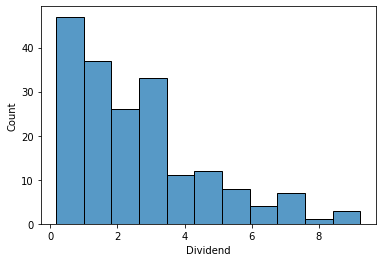

In [37]:
sns.histplot(df['Dividend'])

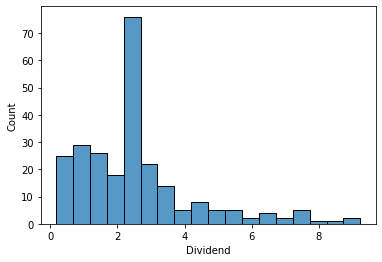

In [38]:
# 결측치를 평균으로 채움
df['Dividend'] = df['Dividend'].fillna(df['Dividend'].mean())
sns.histplot(df['Dividend'])
# 결측치 0으로 채움
# df['Dividend'] = df['Dividend'].fillna(0)

In [39]:
# interpolate: 등차 간격으로 값을 집어넣음
# df = df.interpolate(method='linear', limit_direction='forward')

# IQR 이상치 처리
### 사분위수 : 전체 데이터를 4등분
### Q1 ~ Q3: 0.25 - 0.5 - 0.75
### IQR = Q3 - Q1
### 이상치 = (Q3+IQR*1.5보다 큰 값) & (Q1-IQR*1.5보다 작은값)


In [40]:
import numpy as np

In [41]:
def iqr_outliers(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [i for i, x in enumerate(data) if x < lower_bound or x > upper_bound]
    return outliers

In [42]:
iqr_outliers(df['PBR'])

[22, 24, 62, 63, 64, 76, 91, 124, 137, 177, 187, 189, 191, 220, 221, 239, 240]

In [52]:
Q1 = df['PBR'].quantile(q=0.25)
Q3 = df['PBR'].quantile(q=0.75)
IQR_w = (Q3 - Q1)*1.5
th_min = Q1 - IQR_w
th_max = Q3 + IQR_w

idx = df[(df['PBR']< th_min)|(df['PBR']> th_max)].index.tolist()
df['PBR']=df['PBR'].drop(idx)

In [53]:
idx

[22, 24, 62, 63, 64, 76, 91, 124, 137, 177, 187, 189, 191, 220, 221, 239, 240]

In [54]:
df['PBR'].tail(20)

230    0.75
231    0.74
232    0.23
233    0.51
234    0.88
235    1.26
236    2.38
237    0.67
238    0.72
239     NaN
240     NaN
241    0.28
242    2.00
243    0.80
244    0.51
245    1.27
246    0.27
247    0.38
248    0.99
249    0.99
Name: PBR, dtype: float64

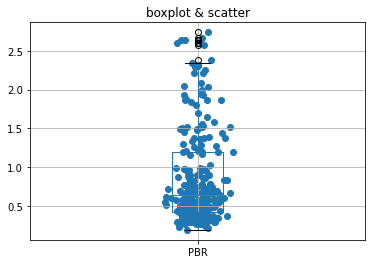

In [55]:
import numpy as np
def boxplot_scatter(col):
  for i, d in enumerate(col):
    y = col[d]
    x = np.random.normal(i+1, 0.04, len(y))
    plt.scatter(x,y)
  plt.title('boxplot & scatter')
df[['PBR']].boxplot()
boxplot_scatter(df[['PBR']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb103556400>]],
      dtype=object)

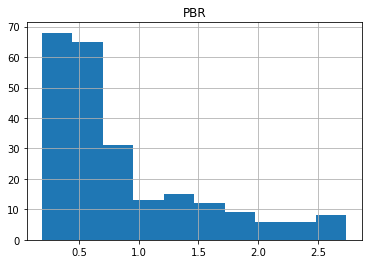

In [56]:
df[['PBR']].hist()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


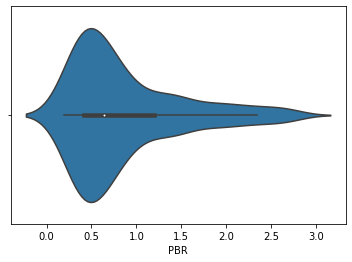

In [57]:
sns.violinplot(df['PBR'])